In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/psychopath_data/PersonalityData_ExternalVersion001.csv')

In [ ]:
data['Var20'] = pd.to_numeric(data['Var20'] , errors = 'coerce')
data = data.drop(['uid'] , axis = 1)

In [ ]:
pd.set_option('display.max_row', None)
is_null = data.isna().sum(axis = 1)
data['cnt_null'] = is_null
data['cnt_null'].value_counts()

,count
cnt_null,
0,2467
91,188
1,133
90,114
79,12
98,11
80,1
81,1


In [ ]:
pd.set_option('display.max_row', None)

In [ ]:
data.info(verbose = True , show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 109 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    psychopathy        2927 non-null   float64
 1    machiavellianism   2927 non-null   float64
 2    narcissism         2927 non-null   float64
 3    openness           2927 non-null   float64
 4    conscientiousness  2927 non-null   float64
 5    extraversion       2927 non-null   float64
 6    agreeableness      2927 non-null   float64
 7    neuroticism        2927 non-null   float64
 8    Var1               2593 non-null   float64
 9    Var2               2614 non-null   float64
 10   Var3               2614 non-null   float64
 11   Var4               2614 non-null   float64
 12   Var5               2614 non-null   float64
 13   Var6               2614 non-null   float64
 14   Var7               2614 non-null   float64
 15   Var8               2614 non-null   float64
 16   Var9

# MICE

In [ ]:
!pip install impyute

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge


imputer = IterativeImputer(
    estimator = BayesianRidge(),
    max_iter = 0 ,
    random_state = 42
)

df_imputer = pd.DataFrame(imputer.fit_transform(data) , columns= data.columns)

df_imputer.head(5)


,psychopathy,machiavellianism,narcissism,openness,conscientiousness,extraversion,agreeableness,neuroticism,Var1,Var2,...,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,cnt_null
0,2.444444,3.4,3.444444,7.0,6.0,5.5,3.5,3.5,48.59,0.0,...,1.31,2.05,0.66,0.92,1.14,4.37,0.71,15.11,45.70,0.0
1,1.888889,2.4,2.777778,7.0,4.5,6.0,3.0,5.5,41.29,0.0,...,0.04,0.46,2.34,2.99,0.38,1.46,2.83,21.90,53.49,0.0
2,1.111111,3.0,3.444444,5.5,6.0,6.0,6.5,3.0,14.65,0.0,...,0.20,2.63,1.72,0.64,0.42,2.74,0.11,10.13,32.77,0.0
3,1.888889,3.0,2.444444,5.0,3.5,2.0,6.5,1.5,17.60,0.0,...,0.16,1.43,2.42,1.07,1.67,3.46,0.35,5.65,32.67,0.0
4,2.111111,3.1,1.333333,6.0,5.5,2.5,5.5,5.0,52.63,9.0,...,0.08,1.14,0.38,0.85,1.05,4.67,0.38,8.34,34.25,0.0


In [ ]:
df_imputer.info(
    verbose = True,
    show_counts = True
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 109 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    psychopathy        2927 non-null   float64
 1    machiavellianism   2927 non-null   float64
 2    narcissism         2927 non-null   float64
 3    openness           2927 non-null   float64
 4    conscientiousness  2927 non-null   float64
 5    extraversion       2927 non-null   float64
 6    agreeableness      2927 non-null   float64
 7    neuroticism        2927 non-null   float64
 8    Var1               2927 non-null   float64
 9    Var2               2927 non-null   float64
 10   Var3               2927 non-null   float64
 11   Var4               2927 non-null   float64
 12   Var5               2927 non-null   float64
 13   Var6               2927 non-null   float64
 14   Var7               2927 non-null   float64
 15   Var8               2927 non-null   float64
 16   Var9

# cGAN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rng = np.random.default_rng(42)
torch.manual_seed(42)
np.random.seed(42)


X = df_imputer.drop('psychopathy' , axis  = 1)
y = df_imputer['psychopathy']


X_train , X_test , y_train , y_test = train_test_split(X , y ,random_state= 42 , test_size = 0.2)

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaled = x_scaler.fit_transform(X_train)
x_test_s = x_scaler.transform(X_test)

y_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()
y_test_s  = y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).ravel()



# 텐서화
x_t = torch.tensor(x_scaled , dtype = torch.float32)
y_t = torch.tensor(y_scaled , dtype = torch.float32).unsqueeze(1)

# 배치 구성
dataset = TensorDataset(x_t , y_t)
loader = DataLoader(dataset , batch_size = 256 , shuffle= True , drop_last= True) # 256개의 (real_x , real_y를 꺼내줌)


n_feature = x_t.shape[1]
z_dim = 32 # 노이즈 차원
y_dim = 1 # y 차원 수 지정 (연속일 경우 1)


In [ ]:
class Generator(nn.Module):
    def __init__(self , z_dim , y_dim , n_feature):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim + y_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(256),
            nn.Linear(256, n_feature)  # X의 feature 개수 그대로
        )
    def forward(self, z, y):
      return self.net(torch.cat([z, y], dim=1))

class Discriminator(nn.Module):
    def __init__(self, n_feature, y_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_feature + y_dim, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  # BCEWithLogitsLoss와 함께 사용
        )
    def forward(self, x, y):
      return self.net(torch.cat([x, y], dim=1))

G = Generator(z_dim, y_dim , n_feature).to(device)
D = Discriminator(n_feature , y_dim).to(device)

criterion = nn.BCEWithLogitsLoss()
opt_G = torch.optim.Adam(G.parameters(), lr=1e-3, betas=(0.5, 0.9))
opt_D = torch.optim.Adam(D.parameters(), lr=1e-3, betas=(0.5, 0.9))


In [ ]:
from logging import critical
# 학습루프

# 학습루프 안에서 배치 꺼내기 [(trian set)데이터의 데이터]


epochs = 100

for epoch  in range(1, epochs + 1):
  for real_x , real_y in loader:
    real_x , real_y = real_x.to(device) , real_y.to(device)

    opt_D.zero_grad()


    # 진짜 데이터
    logits_real = D(real_x , real_y)
    loss_real = criterion(logits_real, torch.ones_like(logits_real))

    # 가짜 데이터 [batch_size , z_dim]
    z = torch.randn(real_x.size(0), z_dim, device=device) # 노이즈 벡터 (real_x.size(0) = 256 , 1:1 대응을 위함)
    fake_x = G(z, real_y)
    logits_fake = D(fake_x.detach(), real_y)
    loss_fake = criterion(logits_fake, torch.zeros_like(logits_fake))


    loss_D = (loss_real + loss_fake) / 2
    loss_D.backward()
    opt_D.step()

    # ------------------
    # 2) Generator 학습
    # ------------------
    opt_G.zero_grad()
    logits_fake_for_G = D(fake_x, real_y)
    loss_G = criterion(logits_fake_for_G, torch.ones_like(logits_fake_for_G))
    loss_G.backward()
    opt_G.step()

  # 10 epoch마다 로그 출력
  if epoch % 10 == 0 or epoch == 1:
    print(f"[{epoch}/{epochs}] Loss_D={loss_D.item():.4f} Loss_G={loss_G.item():.4f}")


[1/100] Loss_D=0.6706 Loss_G=0.6535
[10/100] Loss_D=0.6834 Loss_G=0.7258
[20/100] Loss_D=0.6654 Loss_G=0.7779
[30/100] Loss_D=0.6347 Loss_G=0.8317
[40/100] Loss_D=0.6271 Loss_G=0.8546
[50/100] Loss_D=0.6641 Loss_G=0.8327
[60/100] Loss_D=0.6386 Loss_G=0.8340
[70/100] Loss_D=0.6512 Loss_G=0.8409
[80/100] Loss_D=0.6132 Loss_G=0.8925
[90/100] Loss_D=0.6313 Loss_G=0.8892
[100/100] Loss_D=0.6413 Loss_G=0.8344


In [ ]:
from os import replace
# 학습이 끝난 G를 실제로 사용하여 가짜 데이터 만들기
def generate_pairs():
  y_samples_np = np.random.choice(y_train.to_numpy() , size=500).astype(np.float32) # 극소부분만 만들기


  y_cond = y_scaler.transform(np.asarray(y_samples_np).reshape(-1,1)).astype(np.float32)
  y_t = torch.tensor(y_cond, dtype = torch.float32, device = device)


  # 노이즈
  z = torch.randn(len(y_samples_np) , z_dim , device= device)

  # x' 생성
  G.eval()
  x_gen_scaled = G(z, y_t).detach().cpu().numpy()
  x_gen = x_scaler.inverse_transform(x_gen_scaled)

  return x_gen, y_samples_np


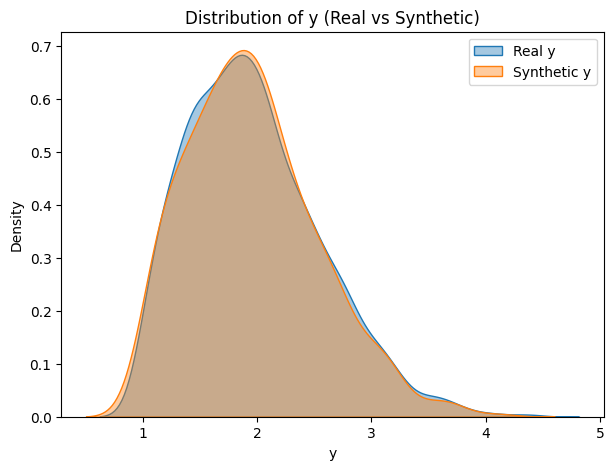

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# 1) 가짜 데이터 생성
X_syn, y_syn = generate_pairs()

# 2) KDE Plot: y 분포 비교
plt.figure(figsize=(7,5))
sns.kdeplot(y_train, label="Real y", fill=True, alpha=0.4)
sns.kdeplot(y_syn, label="Synthetic y", fill=True, alpha=0.4)
plt.title("Distribution of y (Real vs Synthetic)")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
plt.show()